<a href="https://colab.research.google.com/github/ShivathejS/project/blob/main/unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('unemployment.csv')

In [5]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [6]:
df.shape

(768, 7)

In [7]:
df = df.dropna()# i'm dropping the null columns as they can affect the model.

In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [9]:
df.sample(10
          )

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
343,Uttarakhand,31-05-2020,Monthly,3.57,1915482.0,33.94,Rural
684,Telangana,31-05-2019,Monthly,1.52,5560649.0,44.59,Urban
713,Uttar Pradesh,30-06-2019,Monthly,11.62,13624452.0,39.75,Urban
415,Chandigarh,31-05-2019,Monthly,18.35,348042.0,44.89,Urban
601,Meghalaya,31-05-2020,Monthly,14.58,222916.0,48.48,Urban
66,Delhi,31-05-2020,Monthly,22.76,129610.0,34.65,Rural
319,Uttar Pradesh,30-06-2019,Monthly,11.13,42276572.0,39.32,Rural
326,Uttar Pradesh,31-01-2020,Monthly,6.06,45777509.0,39.67,Rural
381,Andhra Pradesh,31-01-2020,Monthly,7.11,4618860.0,35.91,Urban
33,Bihar,31-12-2019,Monthly,10.16,22914530.0,37.25,Rural


In [10]:
df.columns = df.columns.str.strip()
df = df.drop(columns=["Frequency"])


In [11]:
df.sample(5)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
495,Himachal Pradesh,31-05-2019,10.88,245668.0,45.27,Urban
388,Assam,30-06-2019,9.89,1647342.0,45.17,Urban
379,Andhra Pradesh,30-11-2019,7.54,4668772.0,36.62,Urban
199,Maharashtra,31-03-2020,5.38,23130976.0,45.60,Rural
686,Telangana,31-07-2019,3.73,5432503.0,44.36,Urban


In [12]:
covid_start = "2020-03-01"
covid_end = "2021-12-31"


In [14]:
df['covid_period'] = df['Date'].between(covid_start, covid_end)

In [18]:
df.sample(1)#i add covid_period to see if the unemployment has direct realation to covid period

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,covid_period
434,Chhattisgarh,31-12-2019,3.57,2415436.0,45.59,Urban,False


In [22]:
pre_covid = df[df['Date'] < covid_start]['Estimated Unemployment Rate (%)']
covid = df[df['Date'].between(covid_start, covid_end)]['Estimated Unemployment Rate (%)']
print("Pre-COVID Mean:", pre_covid.mean())
print("COVID Mean:", covid.mean())


Pre-COVID Mean: 11.787945945945946
COVID Mean: nan


In [27]:
df['Date'] = df['Date'].astype(str).str.strip()


In [28]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


/tmp/ipython-input-579959469.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [29]:
df['month'] = df['Date'].dt.to_period('M')


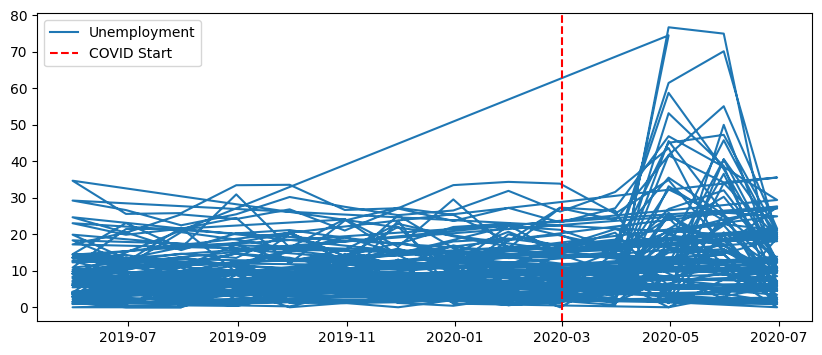

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], label="Unemployment")
plt.axvline(pd.to_datetime("2020-03-01"), color='r', linestyle='--', label='COVID Start')
plt.legend()
plt.show()

In [32]:
#as we can see, the unemployment rates took a huge rise after the start of covid, where i'm linking with covid
#let's now visualize on the basis of states

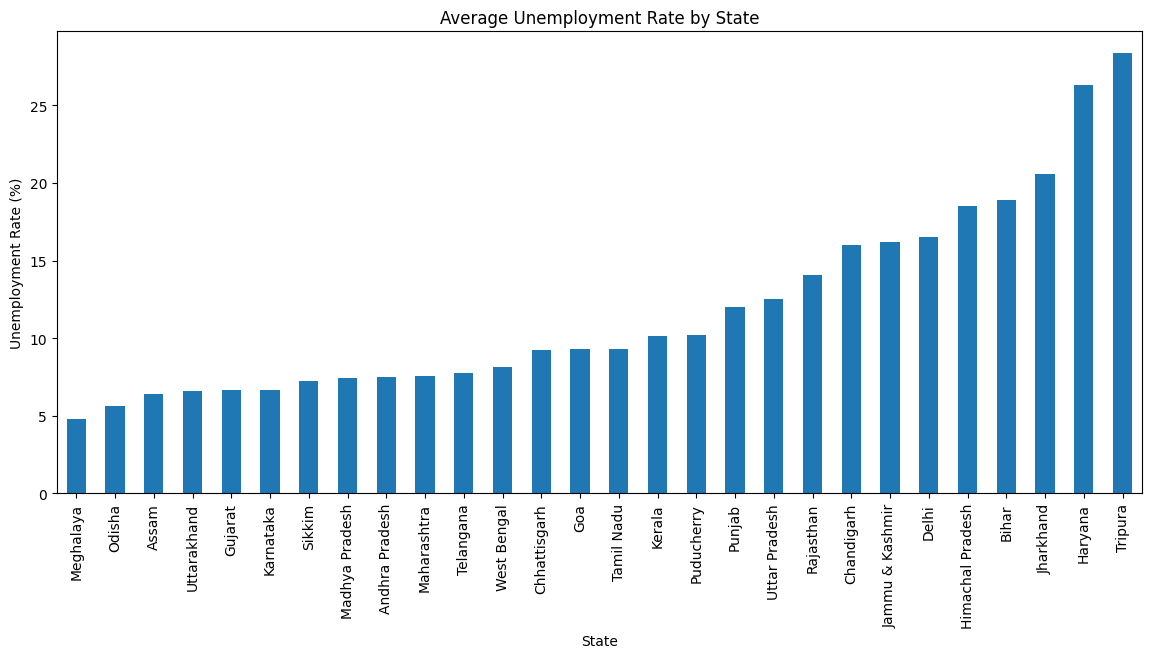

In [36]:
state_unemp = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(14,6))
state_unemp.plot(kind='bar')
plt.title("Average Unemployment Rate by State")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.show()


In [37]:
#now urban vs rural unemployment rates

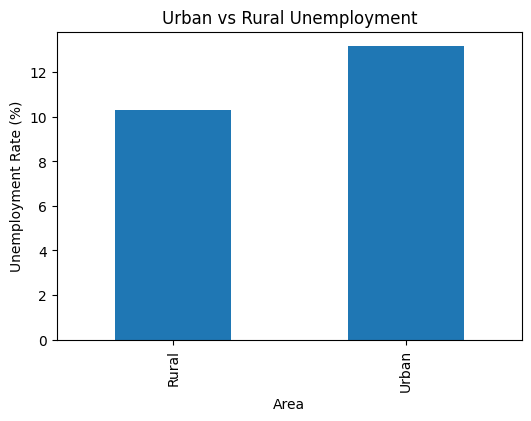

In [38]:
area_unemp = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(6,4))
area_unemp.plot(kind='bar')
plt.title("Urban vs Rural Unemployment")
plt.ylabel("Unemployment Rate (%)")
plt.show()


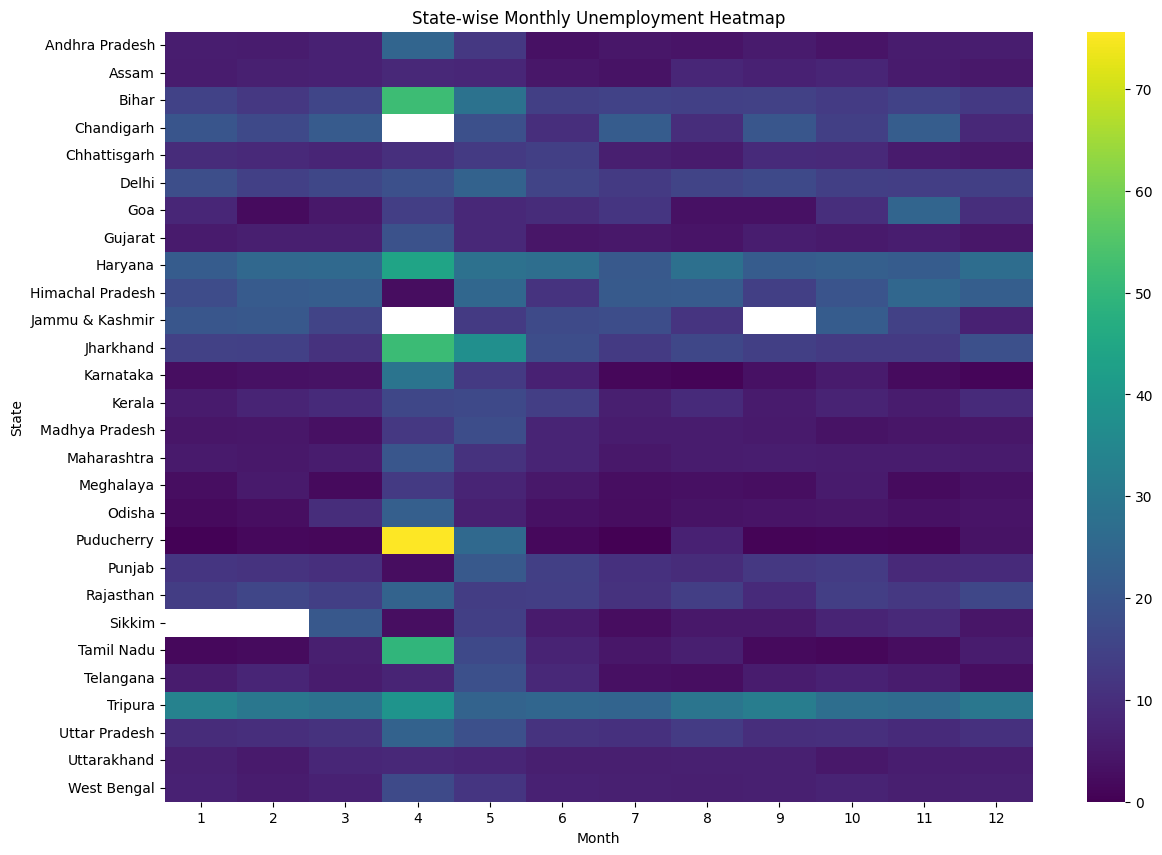

In [40]:
import seaborn as sns
import numpy as np

heat = df.pivot_table(values='Estimated Unemployment Rate (%)',
                      index='Region',
                      columns=df['Date'].dt.month,
                      aggfunc='mean')

plt.figure(figsize=(14,10))
sns.heatmap(heat, cmap='viridis')
plt.title("State-wise Monthly Unemployment Heatmap")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()



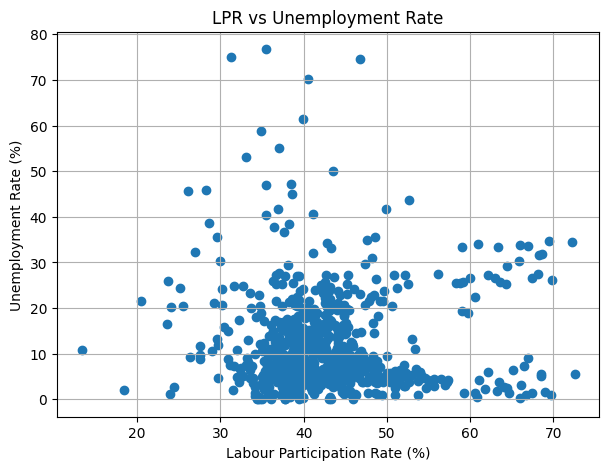

In [41]:
plt.figure(figsize=(7,5))
plt.scatter(df['Estimated Labour Participation Rate (%)'],
            df['Estimated Unemployment Rate (%)'])

plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.title("LPR vs Unemployment Rate")
plt.grid(True)
plt.show()


In [47]:
#these are the visualization of the trends.Let's analyze unemployment rates by highest to lowest, for  which i visualized above
state_unemployment = (
    df.groupby('Region')['Estimated Unemployment Rate (%)']
      .mean()
      .sort_values(ascending=False)
)

print(state_unemployment)


Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name: Estimated Unemployment Rate (%), dtype: float64


In [49]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [50]:
monthly_seasonality = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

print(monthly_seasonality)


Month
1      9.950755
2      9.964717
3     10.700577
4     23.641569
5     16.646190
6     10.553462
7      9.033889
8      9.637925
9      9.051731
10     9.900909
11     9.868364
12     9.497358
Name: Estimated Unemployment Rate (%), dtype: float64


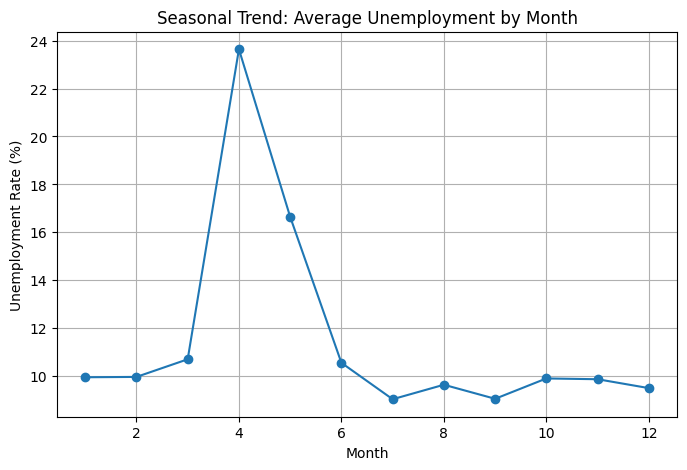

In [52]:
plt.figure(figsize=(8,5))
monthly_seasonality.plot(kind='line', marker='o')
plt.title("Seasonal Trend: Average Unemployment by Month")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


In [53]:
#this is another way to show how much covid affected the unemployment